# 3_9_images

Output;

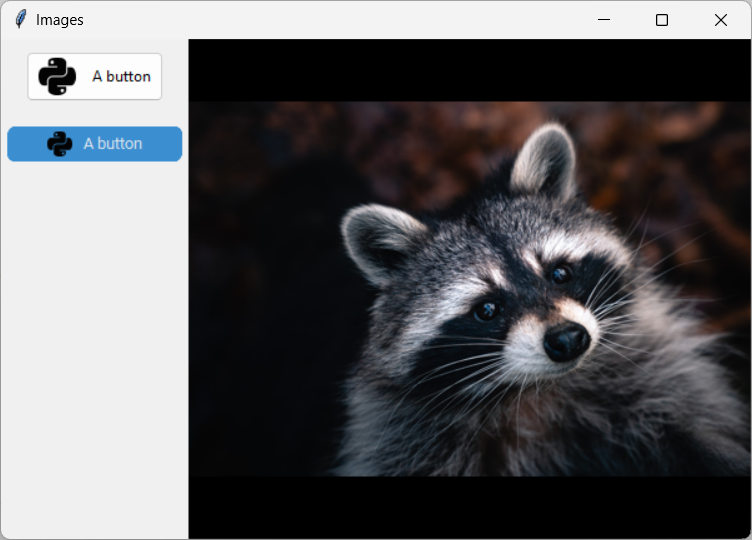 

In [1]:
import tkinter as tk
from tkinter import ttk
import customtkinter as ctk
from PIL import Image, ImageTk

def stretch_image(event):
	global resized_tk

	# size 
	width = event.width
	height = event.height

	# create an image
	resized_image = image_original.resize((width, height))
	resized_tk = ImageTk.PhotoImage(resized_image)

	# place on the canvas
	canvas.create_image(0,0,image = resized_tk, anchor = 'nw')

def fill_image(event):
	global resized_tk

	# current ratio 
	canvas_ratio = event.width / event.height

	# get coordinates 
	if canvas_ratio > image_ratio: # canvas is wider than the image
		width = int(event.width) 
		height = int(width / image_ratio)
	else: # canvas is narrower than the image
		height = int(event.height)
		width = int(height * image_ratio) 

	resized_image = image_original.resize((width, height))
	resized_tk = ImageTk.PhotoImage(resized_image)
	canvas.create_image(
		int(event.width / 2),
		int(event.height / 2),
		anchor = 'center',
		image = resized_tk)

def show_full_image(event):
	global resized_tk

	# current ratio 
	canvas_ratio = event.width / event.height

	# get coordinates 
	if canvas_ratio > image_ratio: # canvas is wider than the image
		height = int(event.height)
		width = int(height * image_ratio) 
	else: # canvas is narrower than the image
		width = int(event.width) 
		height = int(width / image_ratio)



	resized_image = image_original.resize((width, height))
	resized_tk = ImageTk.PhotoImage(resized_image)
	canvas.create_image(
		int(event.width / 2),
		int(event.height / 2),
		anchor = 'center',
		image = resized_tk)

# exercise:
# create a third scaling behaviour to always show the full image without cutting off parts

# setup
window = tk.Tk()
window.geometry('600x400')
window.title('Images')

# grid layout
window.columnconfigure((0,1,2,3), weight = 1, uniform = 'a')
window.rowconfigure(0, weight = 1)

# import an image 
image_original = Image.open('raccoon.jpg')
image_ratio = image_original.size[0] / image_original.size[1]
print(image_ratio)
image_tk = ImageTk.PhotoImage(image_original)

python_dark = Image.open('python_dark.png').resize((30,30))
python_dark_tk = ImageTk.PhotoImage(python_dark)

img_ctk = ctk.CTkImage(
	light_image = Image.open('python_dark.png'),
	dark_image = Image.open('python_light.png'))

# widget
# label = ttk.Label(window, text = 'raccoon', image = image_tk)
# label.pack()
button_frame = ttk.Frame(window)
button = ttk.Button(button_frame, text = '   A button', image = python_dark_tk, compound = 'left')
button.pack(pady = 10)

button_ctk = ctk.CTkButton(button_frame, text = 'A button', image = img_ctk, compound = 'left')
button_ctk.pack(pady = 10)

button_frame.grid(column = 0, row = 0, sticky = 'nsew')

# canvas -> image
canvas = tk.Canvas(window, background = 'black', bd = 0, highlightthickness = 0, relief = 'ridge')
canvas.grid(column = 1, columnspan = 3, row = 0, sticky = 'nsew')

canvas.bind('<Configure>', show_full_image)

# run
window.mainloop()

1.5
